In [1]:
import requests

In [2]:
# Downloading tesseract-ocr file

r = requests.get(
    'https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata',
    stream = True
)

# Writing data to file to avoid path issues

with open('/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata', 'wb') as file:
  for block in r.iter_content(chunk_size = 1024):
    if block:
      file.write(block)



In [3]:
!apt install tesseract-ocr libtesseract-dev libmagickwand-dev

from IPython.display import HTML, clear_output

clear_output()
print("Done!")

Done!


In [4]:
# Installing pytesseract and opencv
!pip install pytesseract wand opencv-python
clear_output()


In [38]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

import streamlit as st
import pytesseract
from PIL import Image
import cv2
import numpy as np
import os

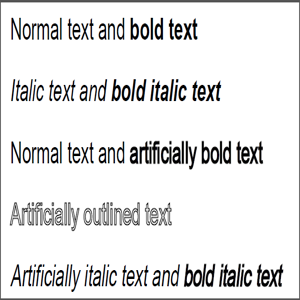

In [6]:
# Reading image from URL

image = Image.open(
    requests.get(
        'https://i.stack.imgur.com/pbIdS.png',
        stream = True
    ).raw
)

image = image.resize((300,300))
image.save('sample.png')
image

In [11]:
!apt update
!apt install -y tesseract-ocr


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,424 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,452 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/ma

In [8]:
!pip install pytesseract

In [12]:
# Simply extracting text from image
import pytesseract

custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(
    image, config = custom_config
)
print(text)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Arificialy outined text

Artificially italic text and bold italic text



In [13]:
# Extracting text from image and removing irrelevant symbols from characters

try:
  text = pytesseract.image_to_string(image,lang="eng")
  characters_to_remove = "!()@-*>+-/,'|#%$&_~"
  new_string = text
  for character in characters_to_remove:
    new_string = new_string.replace(character, "")
  print(new_string)
except IOError as e:
  print("Error (%s)." % e)


 

 

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Arificialy outined text

Artificially italic text and bold italic text

 

 



In [14]:
image = cv2.imread("sample.png")

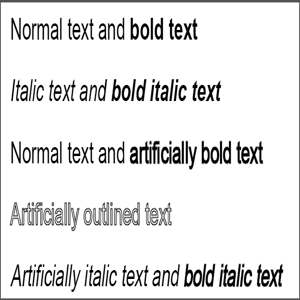

In [15]:
# get greyscale image

def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = get_grayscale(image)
Image.fromarray(gray)

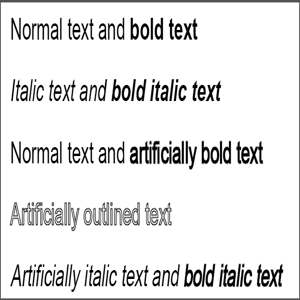

In [16]:
# Noise Removal

def remove_noise(image):
  return cv2.medianBlur(image, 5)

noise = remove_noise(gray)
Image.fromarray(gray)

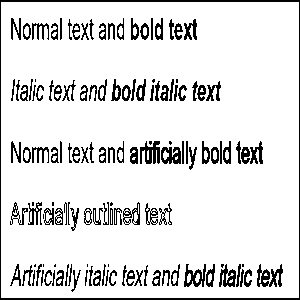

In [17]:
# Thresholding
def thresholding(image):
  return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

thresh = thresholding(gray)
Image.fromarray(thresh)

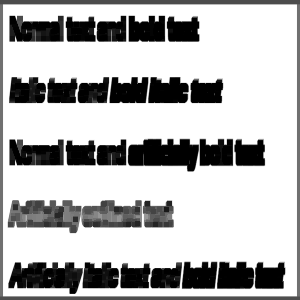

In [18]:
# erosion

def erode(image):

  kernel = np.ones((5,5), np.uint8)
  return cv2.erode(image, kernel, iterations = 1)

erode = erode(gray)
Image.fromarray(erode)

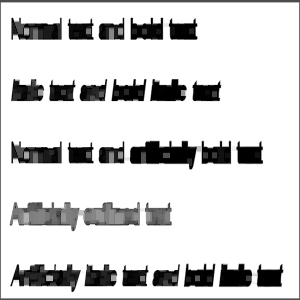

In [19]:
# Morphology

def opening(image):
  kernel = np.ones((5,5), np.uint8)
  return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

opening = opening(gray)
Image.fromarray(opening)

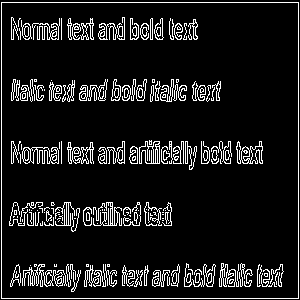

In [20]:
# Canny Edge Detection

def canny(image):
  return cv2.Canny(image, 100, 200)

canny = canny(gray)
Image.fromarray(canny)


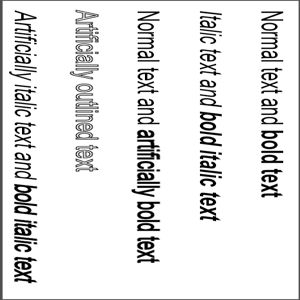

In [22]:
# SkewCorrection

def deskew(image):
  coords = np.column_stack(np.where(image>0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle

  (h,w) = image.shape[:2]
  center = (w//2, h//2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(
      image, M, (w,h), flags = cv2.INTER_CUBIC,
      borderMode = cv2.BORDER_REPLICATE
  )
  return rotated

rotated = deskew(gray)
Image.fromarray(rotated)

In [24]:
# Template Matching

def match_template(image, template):
  return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

match = match_template(gray, gray)
match

array([[1.]], dtype=float32)

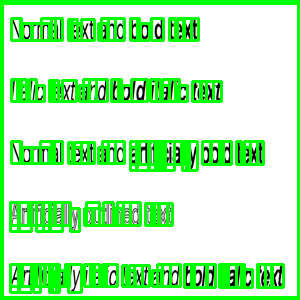

In [25]:
# Drawing rectangles around text

img = cv2.imread("sample.png")
h,w,c = img.shape
boxes = pytesseract.image_to_boxes(img)

for b in boxes.splitlines():
  b = b.split(' ')
  img = cv2.rectangle(
      img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0,255,0), 2
  )

Image.fromarray(img)

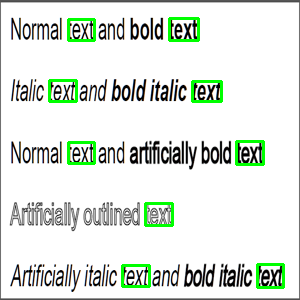

In [29]:
c

# GUI Implementation

In [54]:
# Install required libraries
!pip install streamlit pyngrok pytesseract pillow opencv-python


In [74]:
%%writefile app.py
import streamlit as st
import pytesseract
from PIL import Image
import cv2
import numpy as np

Overwriting app.py


In [75]:
# Title and instructions for the app

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*missing ScriptRunContext.*")

st.title("Image Text Extractor")
st.write("Upload an image to extract text using Tesseract OCR.")


2024-11-14 06:33:43.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 06:33:43.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 06:33:43.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 06:33:43.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 06:33:43.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 06:33:43.804 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [76]:
# Upload the image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)
    st.write("")

    # Convert the image to an OpenCV-compatible format
    open_cv_image = np.array(image)
    open_cv_image = cv2.cvtColor(open_cv_image, cv2.COLOR_RGB2BGR)

    # Convert to grayscale for better OCR accuracy
    gray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)

    # Perform OCR using Tesseract
    with st.spinner("Extracting text..."):
        text = pytesseract.image_to_string(gray, lang="eng")

    # Display the extracted text
    st.subheader("Extracted Text:")
    st.text_area(" ", text, height=200)

2024-11-14 06:33:43.814 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 06:33:43.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 06:33:43.819 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 06:33:43.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 06:33:43.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [77]:
from pyngrok import ngrok
import os

# Set the correct ngrok authentication token
ngrok.set_auth_token("2opTL9UDbWBxlTPN3I3PDpVUlhA_2uZSEpQD7DEG8bEur6cKJ")

# Run Streamlit app in the background (ensure Streamlit is running on port 8501)
os.system("streamlit run app.py &")

# Create an ngrok tunnel to the Streamlit app
public_url = ngrok.connect("http://localhost:8501")
print("Streamlit app is running on:", public_url)


Streamlit app is running on: NgrokTunnel: "https://2740-35-204-28-235.ngrok-free.app" -> "http://localhost:8501"


In [78]:
os.system("streamlit run app.py")


2